In [1]:

# Import pandas and biothings explorers modules
import pandas as pandas
from biothings_explorer.query.predict import Predict
from biothings_explorer.query.visualize import display_graph
from biothings_explorer.user_query_dispatcher import FindConnection
from biothings_explorer.hint import Hint
import nest_asyncio
nest_asyncio.apply()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 
ht = Hint()

In [2]:

covid = ht.query('COVID-19')['Disease'][0]
covid

{'MONDO': 'MONDO:0100096',
 'DOID': 'DOID:0080600',
 'name': 'COVID-19',
 'primary': {'identifier': 'MONDO',
  'cls': 'Disease',
  'value': 'MONDO:0100096'},
 'display': 'MONDO(MONDO:0100096) DOID(DOID:0080600) name(COVID-19)',
 'type': 'Disease'}

In [10]:
pd = Predict(input_objs=[covid], intermediate_nodes=['PhenotypicFeature', 'Gene'], 
output_types='Pathway', config={"annotate": ["nodeDegree", "edgesOut"],
    "expand": True})

In [11]:
pd.connect(verbose=True)


========== QUERY EXPANSION ==========

You have selected to expand your inputs.
7 unique bioentities have been found as subclass of your inputs.

========== QUERY PARAMETER SUMMARY ==========

Your query have 8 input nodes, including COVID-19,asymptomatic COVID-19 infection,mild COVID-19 infection,moderate COVID-19 infection,severe COVID-19 infection .... And BTE will find paths that connect your input nodes to your output types Pathway. Paths will contain 2 intermediate nodes.

Intermediate node #1 will have these type constraints: PhenotypicFeature
Intermediate node #2 will have these type constraints: Gene

========== Query # 1 ==========

==== Step #1: Query Path Planning ====

Input Types: Disease
Output Types: PhenotypicFeature
Predicates: None

BTE found 2 APIs based on SmartAPI Meta-KG.

API 1. mydisease.info API (1 API calls)
API 2. BioLink API (8 API calls)


==== Step #2: Query path execution ====

NOTE: API requests are dispatched in parallel, so the list of APIs below is 

In [14]:
df1 = pd.display_table_view(extra_fields=['edgesOut'])

In [15]:
df1.sort_values(by="output_degree", ascending=False)

,input_id,input_label,input_type,pred1,pred1_source,pred1_api,pred1_publications,node1_id,node1_label,node1_type,...,pred2_edgesOut,pred3,pred3_source,pred3_api,pred3_publications,output_id,output_label,output_type,output_degree,pred3_edgesOut
3496,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0013404,Respiratory distress,PhenotypicFeature,...,116,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-162582,Signal Transduction,Pathway,139,10
1462,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0027498,Nausea and vomiting,PhenotypicFeature,...,190,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-162582,Signal Transduction,Pathway,139,10
2866,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0000737,Abdominal pain,PhenotypicFeature,...,14,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-162582,Signal Transduction,Pathway,139,10
2865,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0000737,Abdominal pain,PhenotypicFeature,...,14,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-162582,Signal Transduction,Pathway,139,10
10138,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0013404,Respiratory distress,PhenotypicFeature,...,128,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-162582,Signal Transduction,Pathway,139,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0027498,Nausea and vomiting,PhenotypicFeature,...,93,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-9669921,REACT:R-HSA-9669921,Pathway,1,1
5113,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0027498,Nausea and vomiting,PhenotypicFeature,...,93,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-9669917,REACT:R-HSA-9669917,Pathway,1,1
5112,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0027498,Nausea and vomiting,PhenotypicFeature,...,93,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-9669914,REACT:R-HSA-9669914,Pathway,1,1
605,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0013404,Respiratory distress,PhenotypicFeature,...,83,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-5619087,Defective SLC12A3 causes Gitelman syndrome (GS),Pathway,1,1


In [22]:
df2 = df1[df1['output_label'].isin(['Cytokine Signaling in Immune system', 'PI3K-Akt Signaling Pathway', 'MAPK family signaling cascades', 'RAF/MAP kinase cascade'])]

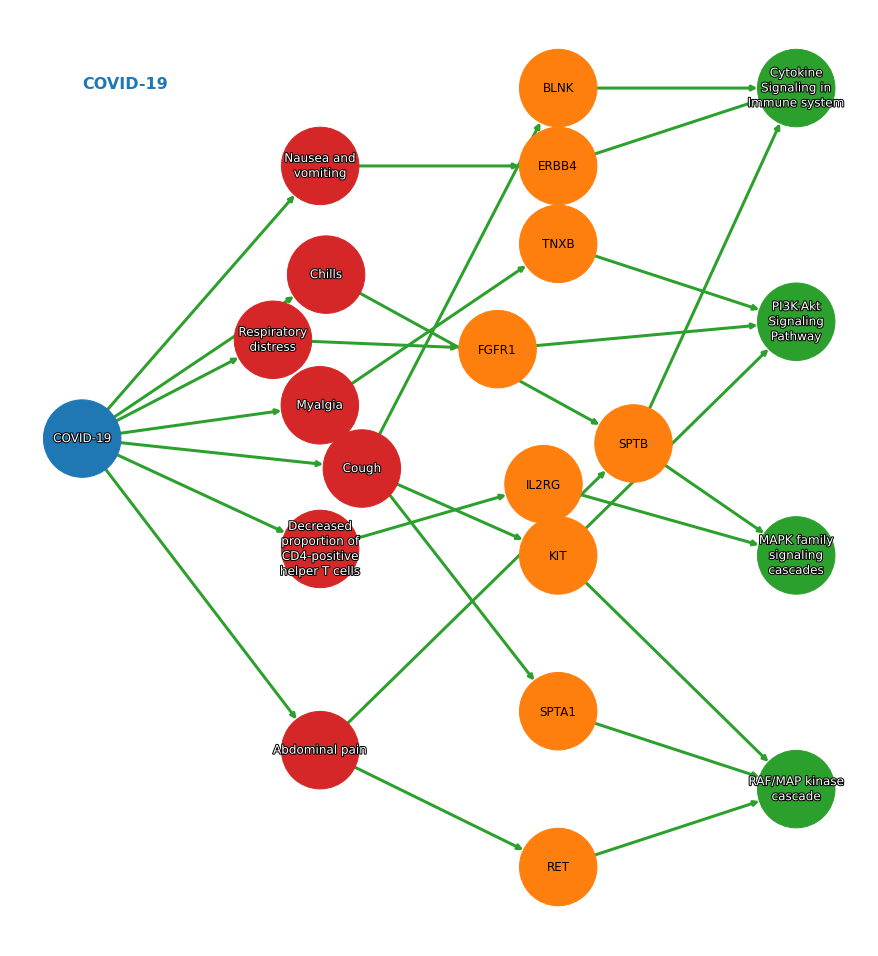

In [23]:
display_graph(df2.sort_values(by="output_degree", ascending=False))

In [18]:
df1.sort_values(by="output_degree", ascending=False)[['output_id', 'output_label', 'output_degree']].drop_duplicates().head(50)

,output_id,output_label,output_degree
3496,REACT:R-HSA-162582,Signal Transduction,139
9699,REACT:R-HSA-1430728,Metabolism,121
4370,REACT:R-HSA-168256,Immune System,117
8472,REACT:R-HSA-1643685,Disease,109
5651,REACT:R-HSA-392499,Metabolism of proteins,83
9692,REACT:R-HSA-74160,Gene expression (Transcription),68
6753,REACT:R-HSA-1266738,Developmental Biology,67
7455,REACT:R-HSA-73857,RNA Polymerase II Transcription,62
5970,REACT:R-HSA-1280215,Cytokine Signaling in Immune system,60
1583,REACT:R-HSA-212436,Generic Transcription Pathway,60


In [3]:
pd = Predict(input_objs=[covid], intermediate_nodes=['PhenotypicFeature'], 
output_types='Gene', config={"annotate": ["nodeDegree", "edgesOut"],
    "expand": True})

In [4]:
pd.connect(verbose=True)


========== QUERY EXPANSION ==========

You have selected to expand your inputs.
7 unique bioentities have been found as subclass of your inputs.

========== QUERY PARAMETER SUMMARY ==========

Your query have 8 input nodes, including COVID-19,asymptomatic COVID-19 infection,mild COVID-19 infection,moderate COVID-19 infection,severe COVID-19 infection .... And BTE will find paths that connect your input nodes to your output types Gene. Paths will contain 1 intermediate nodes.

Intermediate node #1 will have these type constraints: PhenotypicFeature

========== Query # 1 ==========

==== Step #1: Query Path Planning ====

Input Types: Disease
Output Types: PhenotypicFeature
Predicates: None

BTE found 2 APIs based on SmartAPI Meta-KG.

API 1. mydisease.info API (1 API calls)
API 2. BioLink API (8 API calls)


==== Step #2: Query path execution ====

NOTE: API requests are dispatched in parallel, so the list of APIs below is ordered by query time.

API 1.1: http://mydisease.info/v1/query

In [5]:
df = pd.display_table_view(extra_fields=["edgesOut"])

In [6]:
df

,input_id,input_label,input_type,pred1,pred1_source,pred1_api,pred1_publications,node1_id,node1_label,node1_type,...,pred1_edgesOut,pred2,pred2_source,pred2_api,pred2_publications,output_id,output_label,output_type,output_degree,pred2_edgesOut
0,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,HP:0025143,Chills,PhenotypicFeature,...,11.0,related_to,"orphanet,hpoa",BioLink API,None,NCBIGene:6710,SPTB,Gene,3,43
1,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,HP:0025143,Chills,PhenotypicFeature,...,11.0,related_to,"orphanet,hpoa",BioLink API,None,NCBIGene:6708,SPTA1,Gene,3,40
2,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,HP:0025143,Chills,PhenotypicFeature,...,11.0,related_to,"orphanet,hpoa",BioLink API,None,NCBIGene:6521,SLC4A1,Gene,3,73
3,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,HP:0025143,Chills,PhenotypicFeature,...,11.0,related_to,"orphanet,hpoa",BioLink API,None,NCBIGene:286,ANK1,Gene,3,28
4,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,HP:0025143,Chills,PhenotypicFeature,...,11.0,related_to,"orphanet,hpoa",BioLink API,None,NCBIGene:2035,EPB41,Gene,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0151934,Hypogeusia,PhenotypicFeature,...,6.0,related_to,"omim,coriell,orphanet,clinvar,hpoa",BioLink API,"PMID:20301359,PMID:11179008,PMID:9536098,PMID:...",NCBIGene:8518,ELP1,Gene,1,61
709,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0151934,Hypogeusia,PhenotypicFeature,...,6.0,related_to,"omim,orphanet,hpoa",BioLink API,None,NCBIGene:55630,SLC39A4,Gene,1,45
710,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0151934,Hypogeusia,PhenotypicFeature,...,6.0,related_to,"omim,hpoa",BioLink API,None,NCBIGene:65125,WNK1,Gene,1,41
711,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0151934,Hypogeusia,PhenotypicFeature,...,6.0,related_to,"omim,gwascatalog,coriell,hpoa",BioLink API,None,NCBIGene:2629,GBA,Gene,5,232


In [13]:
df.loc[df['output_label'] == "LMNA"]

,input_id,input_label,input_type,pred1,pred1_source,pred1_api,pred1_publications,node1_id,node1_label,node1_type,...,pred1_edgesOut,pred2,pred2_source,pred2_api,pred2_publications,output_id,output_label,output_type,output_degree,pred2_edgesOut
327,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0231528,Myalgia,PhenotypicFeature,...,179.0,related_to,"omim,orphanet,hpoa",BioLink API,None,NCBIGene:4000,LMNA,Gene,2,299
419,MONDO:0100096,COVID-19,Disease,related_to,covid_phenotypes,mydisease.info API,None,UMLS:C0231528,Myalgia,PhenotypicFeature,...,179.0,related_to,EBI,EBIgene2phenotype API,None,NCBIGene:4000,LMNA,Gene,2,299


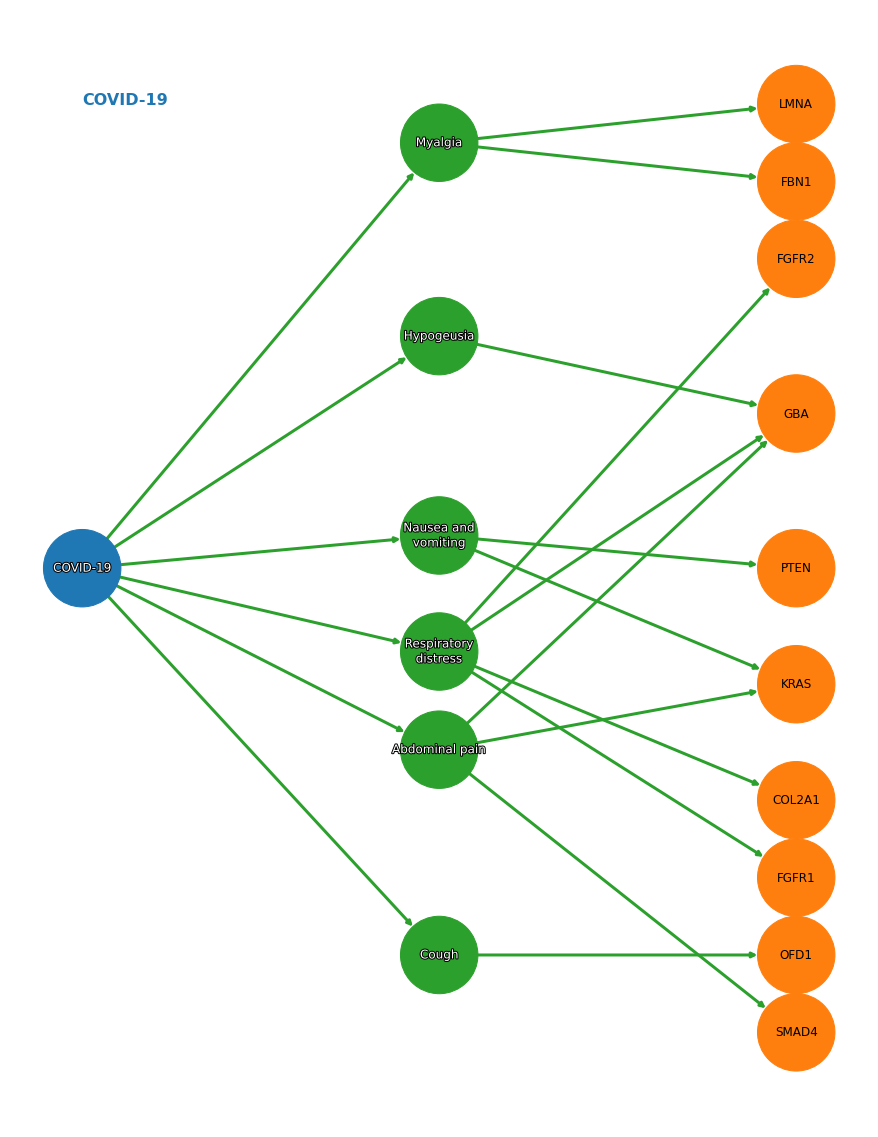

In [9]:
display_graph(df.sort_values(by="pred2_edgesOut", ascending=False))